*PROBLEMA 1*                            *CECILIO DAVID SANCHEZ HERNANDEZ*

*Juego de dados*

En un juego de dados hay 3 reglas

1-si la suma de los dados da 7,8,9,10,11,12 se gana 10 pesos

2-si se obtine ela suma de 2,3,4,5,6 se pierden 8 pesos

3-si al tirar los dados la suma se repite con el tiro anterior pierdes 15 pesos 



Crear el juego con la simulacion de *montecarlo*


In [444]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [445]:
def tirar_dados():
    dado1 = random.randint(1, 6)
    dado2 = random.randint(1, 6)
    suma = dado1 + dado2
    return suma


In [446]:
def jugar(tirada_anterior):
    resultado = tirar_dados()
    if resultado == tirada_anterior:
        return -15, resultado  # Pérdida de 15 pesos por repetición
    elif 7 <= resultado <= 12:
        return 10, resultado  # Ganancia de 10 pesos
    elif 2 <= resultado <= 6:
        return -8, resultado  # Pérdida de 8 pesos
    else:
        return 0, resultado  # Esto no debería ocurrir con dos dados de seis caras


          Ganancia
count  1000.000000
mean      0.000000
std       9.984974
min     -15.000000
25%      -8.000000
50%      -8.000000
75%      10.000000
max      10.000000


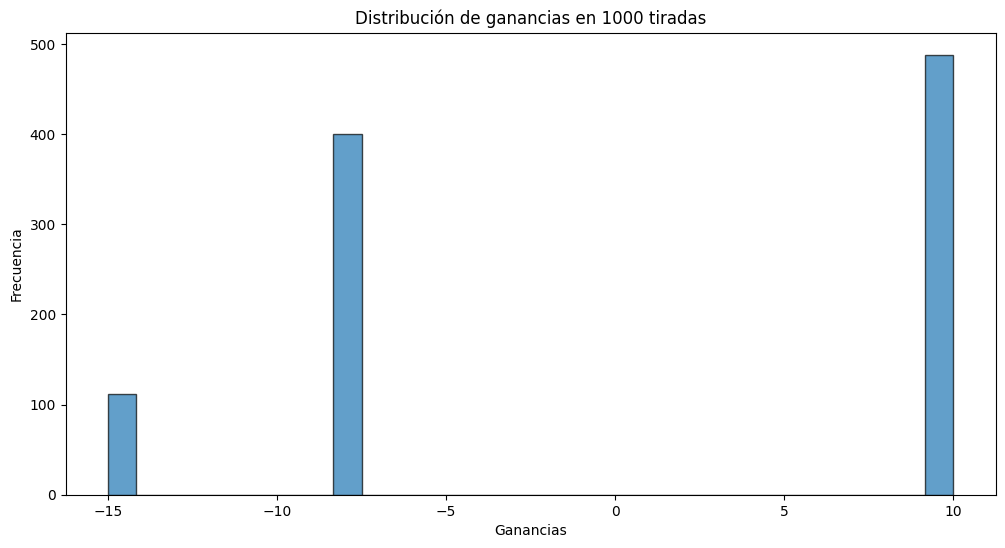

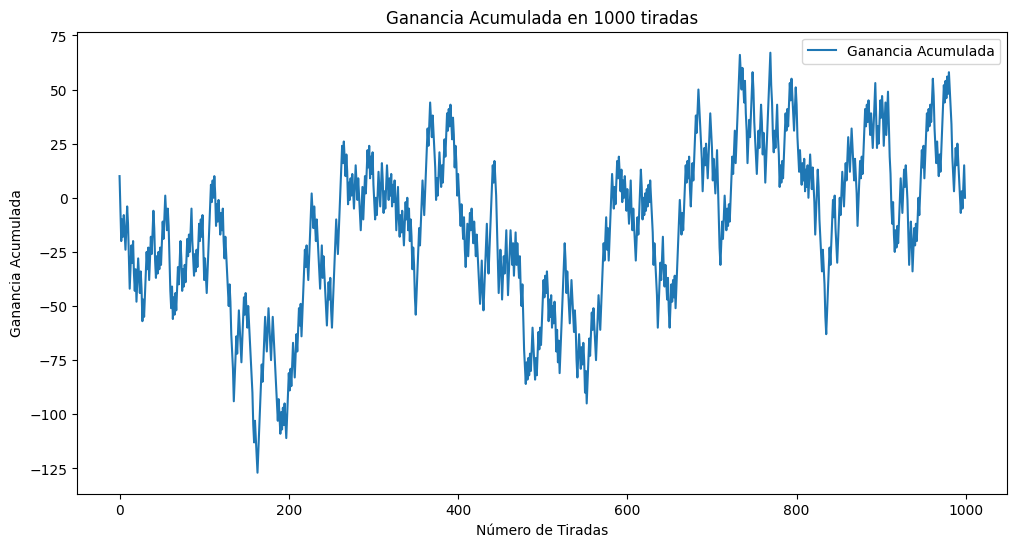

In [447]:
# Número de simulaciones
num_tiradas = 1000

# Variables para almacenar los resultados de las simulaciones
ganancias_totales = 0
resultados = []
tirada_anterior = None

# Realizar las simulaciones
for _ in range(num_tiradas):
    ganancia, tirada_actual = jugar(tirada_anterior)
    ganancias_totales += ganancia
    resultados.append(ganancia)
    tirada_anterior = tirada_actual

# Convertir los resultados a un DataFrame de Pandas
df = pd.DataFrame(resultados, columns=['Ganancia'])

# Mostrar resultados estadísticos
print(df.describe())

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.hist(df['Ganancia'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de ganancias en 1000 tiradas')
plt.xlabel('Ganancias')
plt.ylabel('Frecuencia')
plt.show()

# Graficar las ganancias acumuladas
df['Ganancia Acumulada'] = df['Ganancia'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(df['Ganancia Acumulada'], label='Ganancia Acumulada')
plt.title('Ganancia Acumulada en 1000 tiradas')
plt.xlabel('Número de Tiradas')
plt.ylabel('Ganancia Acumulada')
plt.legend()
plt.show()


Número de Simulaciones: Se definen 1000 tiradas para obtener un conjunto de datos significativo que refleje patrones en las ganancias y pérdidas.

Acumulación de Resultados: Cada tirada se simula mediante la función jugar, y se registran las ganancias o pérdidas. Esto permite acumular un total y observar la variabilidad de los resultados.

Análisis Estadístico: Se utiliza un DataFrame de Pandas para realizar un análisis descriptivo, proporcionando estadísticas clave (media, desviación estándar, etc.) que ayudan a entender la distribución de las ganancias.

Visualización: Se grafican la distribución de ganancias y la ganancia acumulada a lo largo de las tiradas. Esto permite identificar patrones y tendencias en el rendimiento del jugador, esenciales para la evaluación de un juego de azar.


*Riesgo*: Debido a que la mayoría de las tiradas resultan en pérdidas y considerando que las pérdidas máximas (15 pesos) superan las ganancias máximas (10 pesos), el riesgo de perder es mayor que la recompensa de ganar.

*Decisión*:No conviene jugar: Basado en los resultados, el juego no es favorable. La expectativa es neutral, pero con un alto potencial de pérdida. Si buscas una actividad de entretenimiento, puede ser aceptable, pero no es recomendable jugar si el objetivo es ganar dinero.